<a href="https://colab.research.google.com/github/agltkn/Assignments/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
x_train[3].shape

(28, 28)

In [ ]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[5]

2

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
pd.Series(y_train.flatten()).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [ ]:
pd.Series(y_test.flatten()).value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
dtype: int64

In [ ]:
# classes = {0 : "T-shirt/top",
#            1 : "Trouser",
#            2 : "Pullover",
#            3 : "Dress",
#            4 : "Coat",
#            5 : "Sandal",
#            6 : "Shirt",
#            7 : "Sneaker",
#            8 : "Bag",
#            9 : "Ankle boot"}

In [ ]:
# plt.figure(figsize=(20, 20))
# for i in range(64):
#     rand_index = int(np.random.randint(low=0, high=50000, size=1))
#     plt.subplot(8, 8, i+1)
#     plt.axis('off')
#     plt.title(classes[int(y_train[rand_index])])
#     plt.imshow(x_train[rand_index])

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

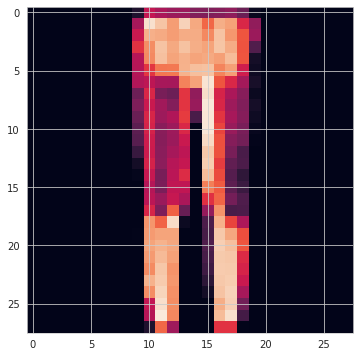

In [ ]:
plt.imshow(x_test[3])

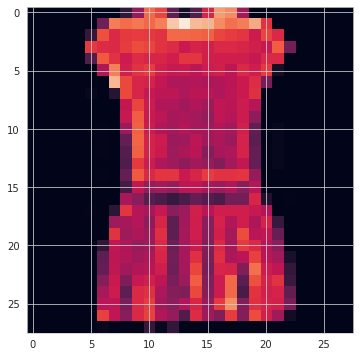

In [ ]:
plt.imshow(x_train[3])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train[3].max()

255

In [ ]:
x_test[3].max()

255

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train[3].max()

1.0

In [ ]:
x_test[3].min()

0.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
y_train.shape

(60000,)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min" , patience=2, restore_best_weights = True)

In [87]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 23, 23, 28)        7084      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 13552)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [89]:
model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test,y_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 186s 98ms/step - loss: 0.4542 - accuracy: 0.8432 - val_loss: 0.3268 - val_accuracy: 0.8916
Epoch 2/50
1875/1875 [==============================] - 180s 96ms/step - loss: 0.3272 - accuracy: 0.8882 - val_loss: 0.3187 - val_accuracy: 0.8873
Epoch 3/50
1875/1875 [==============================] - 178s 95ms/step - loss: 0.3203 - accuracy: 0.8918 - val_loss: 0.3508 - val_accuracy: 0.8857
Epoch 4/50
1875/1875 [==============================] - 180s 96ms/step - loss: 0.3182 - accuracy: 0.8948 - val_loss: 0.3222 - val_accuracy: 0.8901


**TASK 7: Plot values of metrics you used in your model.**

In [92]:
summary = pd.DataFrame(model.history.history)
summary.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.454,0.843,0.327,0.892
1,0.327,0.888,0.319,0.887
2,0.320,0.892,0.351,0.886
3,0.318,0.895,0.322,0.890


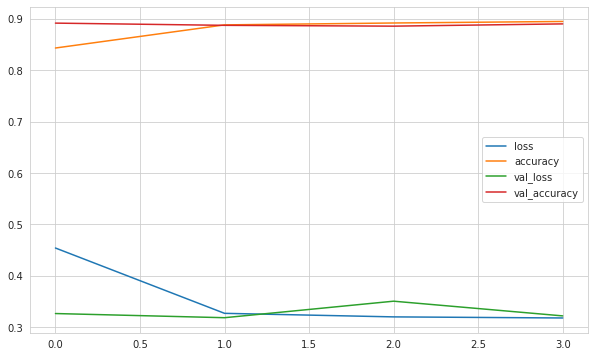

In [93]:
summary.plot();

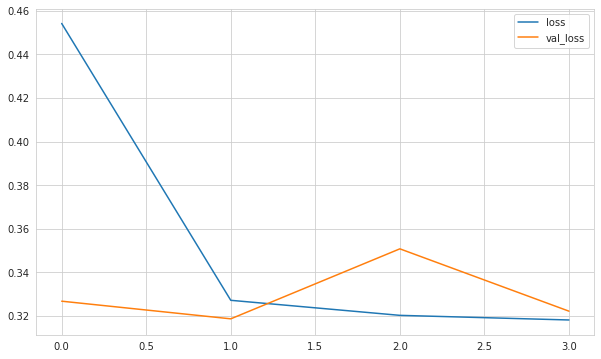

In [91]:
summary[["loss", "val_loss"]].plot();

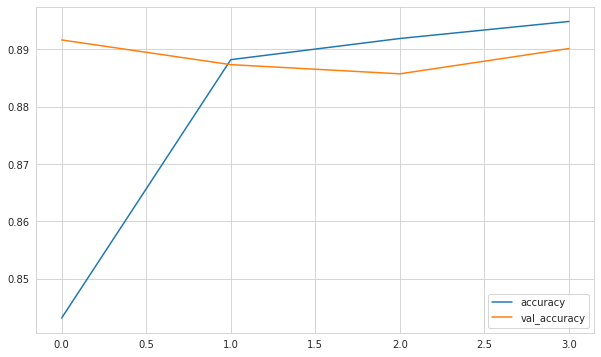

In [94]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [96]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.3187 - accuracy: 0.8873


[0.3186841905117035, 0.8873000144958496]

In [97]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3186841905117035
Test accuracy: 0.8873000144958496


In [98]:
pred_prob = model.predict(x_test)
pred_prob[0]

array([4.2917758e-08, 2.9513009e-08, 8.5372989e-08, 1.2887710e-06,
       7.6044671e-07, 1.5564217e-03, 1.5038994e-06, 2.4770612e-03,
       6.4763384e-07, 9.9596220e-01], dtype=float32)

In [99]:
pred_prob.shape

(10000, 10)

In [100]:
np.argmax(pred_prob[0])

9

In [101]:
y_test_arg = np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(x_test),axis=1)
print('classification_report')
print(classification_report(y_test_arg, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.75      0.81      1000
           3       0.89      0.90      0.89      1000
           4       0.73      0.91      0.81      1000
           5       0.98      0.97      0.98      1000
           6       0.72      0.60      0.66      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [102]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [103]:
print(confusion_matrix(y_test_arg, y_pred))

[[881   3  10  25   2   1  71   1   6   0]
 [  2 972   0  16   5   0   3   0   2   0]
 [ 18   0 748   9 145   0  80   0   0   0]
 [ 19   4   8 897  47   0  25   0   0   0]
 [  1   1  25  22 909   0  41   0   1   0]
 [  0   0   0   0   0 974   0  19   0   7]
 [165   4  58  28 137   0 599   0   9   0]
 [  0   0   0   0   0   6   0 972   0  22]
 [  1   1   3   9   4   5   7   3 967   0]
 [  0   0   0   0   0   5   1  40   0 954]]


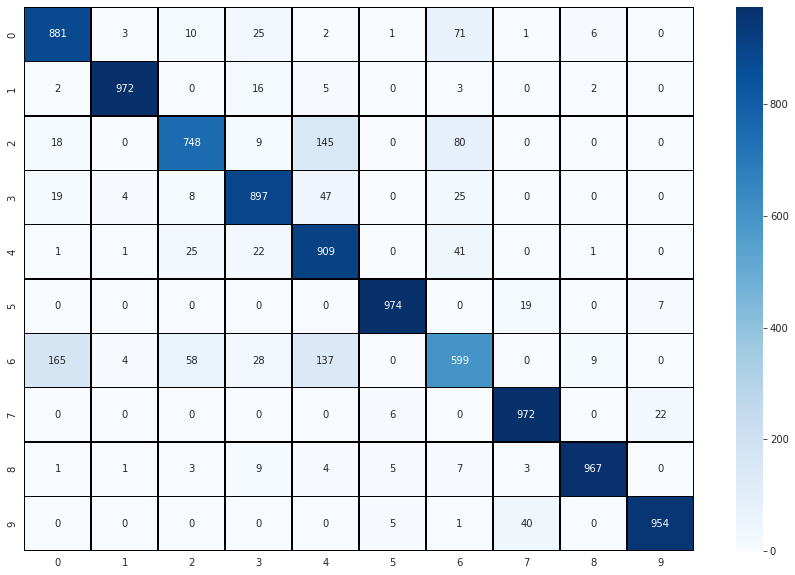

In [104]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test_arg, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 10})

In [105]:
y_test_arg != y_pred 

array([False, False, False, ..., False, False, False])

In [106]:
(y_test_arg != y_pred).sum() 

1127

## Prediction

In [107]:
my_pic = x_test[10]

In [108]:
my_pic.shape

(28, 28, 1)

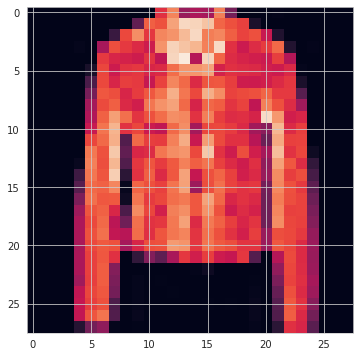

In [109]:
plt.imshow(my_pic.reshape(28,28))

In [110]:
prediction1 = model.predict(my_pic.reshape(1,28,28,1))
prediction1

array([[1.2024396e-04, 3.9367337e-06, 2.6774902e-02, 3.7907663e-05,
        9.1535258e-01, 4.0036657e-06, 5.7651035e-02, 1.4956726e-06,
        4.8538630e-05, 5.4172642e-06]], dtype=float32)

In [111]:
np.argmax(prediction1)

4

In [112]:
model.save("assignment2_D1201_ahmet.h5")

#Prediction Again

In [117]:
samples=[x_test[24], x_test[34], x_test[16], x_test[17]]

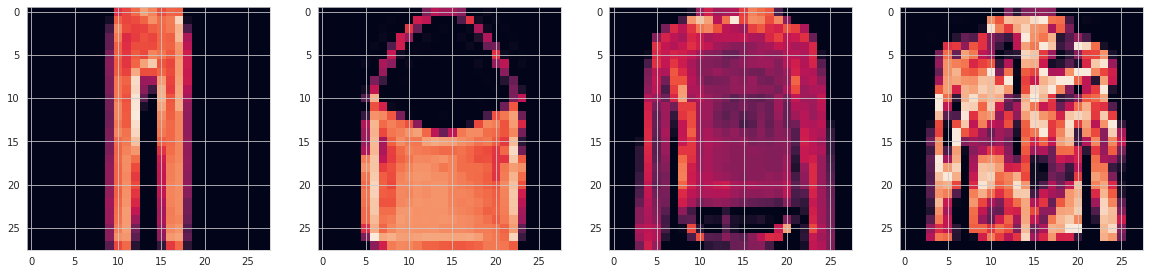

In [118]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [119]:
samples = np.array(samples)
samples

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [121]:
samples.shape

(4, 28, 28, 1)

In [122]:
prediction_again = model.predict(samples)
prediction_again

array([[1.08106200e-07, 9.99994159e-01, 1.53047885e-08, 4.41571638e-06,
        5.90801051e-07, 2.26728170e-09, 4.27630312e-07, 4.02493983e-10,
        2.69777928e-07, 1.18041266e-09],
       [1.07969645e-05, 7.10118964e-10, 3.13703713e-05, 1.73469971e-07,
        1.15047192e-06, 3.93781578e-03, 1.55257949e-04, 1.20113086e-07,
        9.95863318e-01, 3.28689032e-09],
       [1.48186237e-02, 9.43003954e-07, 7.32386768e-01, 8.25613170e-05,
        3.33584584e-02, 2.78683656e-05, 2.18034565e-01, 1.31653576e-06,
        1.28135632e-03, 7.52483584e-06],
       [6.41464503e-05, 4.05132781e-08, 2.57552192e-02, 2.36868527e-06,
        9.02862251e-01, 3.65657407e-08, 7.12851509e-02, 1.56666715e-08,
        3.07621631e-05, 4.51006734e-08]], dtype=float32)

In [125]:
test_array = np.argmax(prediction_again, axis=1)
test_array

array([1, 8, 2, 4])

In [126]:
for i in test_array:
  print(classes[i])

Trouser
Bag
Pullover
Coat


# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___